# Genetic Neural Network Implementation
Nowadays Neural Networks aim to optimize a certain objective function in order to use it as a feature extractor, a classifier or as a regression tool. This function is usually optimized using a stochastic gradient descent method as backpropagation. However, there are a lot of alternatives to the backpropagation procedure.  
In this notebook we will introduce a neural network whose weights are optimized using a Genetic Algorithm.

## Use Case Scenario 
A neural network can be represented from different points of view. In this notebook we want to represent it as a set of arrays that ensemble the weights and the biases of the network. Depending on the complexity of the structure proposed, these variables will scale in number and size, so it must be taken in consideration prior to build a deep neural network.  
The neural network that we are going to build in this notebook is a fully connected one, that means, that every neuron from one layer is connected to all the neurons of the following layer. Every neural network encoding will be an individual of our population in our genetic algorithms implementation.  
The rest of the notebook contains, a specification of the neural network, explanation of the algorithm and a proof that the algorithm actually works as intended.

## Genetic Algorithms
Genetic Algorithms are metaheuristics that use different individuals to explore the search space in order to find the local minimum of the function. These individuals move across the search space using genetic operators.   
Mutation, Crossover and Selection are the three main genetic operators in any genetic algorithm. They allow the solutions population to move across the search space and eventually finding the global minimum of the objective function.  
These three operators take different forms depending on how you represent the data that ensembles the population that navigates the search space. In this project we have implemented them as it follows:  
* Mutation operators take an index of the weight or bias that is going to be modified and with a certain probability mutates the weight with a random operator. This will make sense once we see the operators.
* Selection operator takes the population and all its individuals and select those who are the fittest, although it may not be the best option as we will see in the conclusion area
* Crossover operator takes 2 different solutions of the population and combines them to form 2 new solutions.

## Mutation Operators
In this section we are going to see how the mutations are made to the different solutions, what we effectively call the mutation operators.


In [9]:
import numpy as np

def generate_rand_value(weights,low = -2, high = 2):
  """A function that generates a random value and index just for using them in 
  the substitution funcions blow
  
  Arguments:
      weights {np.array} -- The weight array where the function will choose a 
      position
  
  Keyword Arguments:
      low {int} -- The lower bound to generate the random value (default: {-2})
      high {int} -- The higher bound to generate the random value (default: {2})
  
  Returns:
      index, random_value -- The selected index of the weights to be changed and
      the random number generated with the bounds above
  """
  index = []
  for i in range(len(weights.shape)):
    index.append(np.random.randint(0,weights.shape[i] ))
  index =  tuple(index)
  random_value = np.random.uniform(low=low,high=high)
  return index,random_value

def randomize_a_weight(weights:np.array):
  """Mutates the weights changing one of them for a random value between a scale
  
  Arguments:
      weights {np.array} -- The weights of the neural network to be mutated
  
  Returns:
      weights -- The weights with the mutation 
  """
  index, random_value = generate_rand_value(weights)
  weights.put(index,random_value)
  return weights

def add_a_weighted_random_value(weights:np.array, percentage = 0.1):
  """Mutates a single weight by a factor
  
  Arguments:
      weights {np.array} -- The weights array to be mutated
  
  Keyword Arguments:
      percentage {float} -- The percentage that the weights will be mutated by 
      the random value generated (default: {0.1})
  
  Returns:
      weights -- The mutated weight array.
  """
  index, random_value = generate_rand_value(weights)
  weights.put(index, random_value*percentage)
  return weights

def add_or_substract_a_random_value(weights:np.array):
  """Mutation operator that adds or substracts a random value to the weight
  
  Arguments:
      weights {np.array} -- weight array
  
  Returns:
      weights -- Updated weights
  """
  index,random_value = generate_rand_value(weights,0,1)
  add_or_sbstract = np.random.randint(0,2)
  if add_or_sbstract == 0:
    add_or_sbstract = -1
  weights.put(index, (weights[index])*(random_value*add_or_sbstract))
  return weights

def change_sign_of_a_weight(weights:np.array):
  """Changes the sign of a weight
  
  Arguments:
      weights {np.array} -- weight array
  """
  index, _ = generate_rand_value(weights)
  weights.put(index, -weights[index])
  return weights
  

As you can see in the code cell above, we define 4 different operators and a helper method.  
The helper method selects a random weight or bias and generates a random value to be used by the operator itself.  
The first operator takes the index of the weight or bias and assigns the random value generated to it.
The second operator does the same that the first one but instead of assigning directly the value, it is multiplied by a certain percentage.
The third operator takes the index and adds or subtract randomly the value generated.
The fourth operator takes the index generated and changes the sign of the weight or bias.  
As you can see, they are different, and there are a lot of mutation operators that we can add to this, and since they are selected randomly, it is very simple to implement whatever operator that you can imagine.  
Now we are going to see how the crossover operator is implemented.


In [10]:
import numpy as np

def single_point_crossover(w1: np.array,w2: np.array):
  """Crossover operator that uses a single point as the divisor for the crossover
  operation. It makes an horizontal split between the 2 arrays provided to the
  method
  
  Arguments:
      w1 {np.array} -- 1st array of weights what is going to be used.
      w2 {np.array} -- 2nd array of weights what is going to be used.
  
  Raises:
      AttributeError: If the shapes do not match
  
  Returns:
      w1,w1 -- new arrays of weights ensambling new behaviour
  """
  if w1.shape != w2.shape:
    raise AttributeError("Shapes must be the same if we are going to crossover")
  crossover_point = np.random.randint(0, w1.shape[0])
  w1_splitted = np.split(w1, [crossover_point])
  w2_splitted = np.split(w2, [crossover_point])
  w1_ensembled = np.concatenate([w1_splitted[0], w2_splitted[1]])
  w2_ensembled = np.concatenate([w2_splitted[0], w1_splitted[1]])
  return (w1_ensembled, w2_ensembled)


As can be seen in the code cell above, we implement a single point crossover, we take the point randomly in the vector passed, and combine the vectors.
Similar to the mutation operators you can implement any crossover operator, but in this case the only one that has been implemented is the single point crossover one.  
Lastly let's revise the selection operator.


In [3]:
def selection_operator(self, division:float = 5):
    """Operator that represent the natural selection where they will only survive
    the 20% of the offspring with the best fitness, that is the minimum loss.
    """
    if len(self.population.keys()) <= self.max_pop_size//6:
      return
    reduce__dict = (
        lambda x: {
            k:v for index,(k,v) in enumerate(x.items())
            if index<=self.max_pop_size//division
        })
    self.population = reduce__dict(self.population)

In the code cell above we define the selection operator as the reduction in population by keeping the factor that makes the division of the current number of individuals by the value passed in the method.  
Taking all of these operators, let's see how they interact in the training procedure.  

In [4]:
def train(self, inputs: np.ndarray, targets: np.ndarray, max_iter: int):
    """Training function that defines the evolutive behaviour of the neural net.
    
    Arguments:
        inputs {np.ndarray} -- Input arrays in the form of arrays
        targets {np.ndarray} -- The values desired fot those inputs
        max_iter {int} -- Maximum number of iterations that the nnet will be 
        running.
    """
    for i in range(max_iter):
      activated_results = self.evolved_feed_forward(inputs)
      self.calculate_loss(activated_results, targets)
      
      # Selection operator
      if len(self.population.keys()) > self.max_pop_size or np.random.randint(0,101) < SELECTION_PROBABILITY:
        self.selection_operator()
      # Mutation operator (it mutates weights and biases)
      self.mutate_population()
      # Crossover operator
      self.crossover_populations('W')
      self.crossover_populations('b')
      self.population.update(self.additions)
      self.additions = {}
      self.sort_population()

In the code cell above we can see that the training procedure is executed during max_iter time, and we mutate the population, apply crossover, sort the population and if the conditions are met, use selection to reduce the population.
* mutate_population is a method that tests if every weight and bias in the population is eligible for mutation using certain probability.
* crossover_populations are a method that tests if 2 individuals are eligible for crossover with certain probability.
* additions are the dictionary that takes every mutation and crossover and stores it until the end of the iteration, since if we don't do this, we could enter an infinite cycle.
* sort_populations are a method that sorts the population out by the loss value, being loss, the objective function value given by that neural network with that weights and biases.
* calculate_loss is the function whose responsibility is to store in every individual its loss value.

## Genetic Neural Network Demo.
In this section we will present a python program that is going to provide us the correct instructions in order to obtain results from this genetic neural network.

In [13]:
#Configure Jupyter to use correctly the path related to the code
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

from neuroevolution.networks.genetic_neural_network import GeneticNeuralNetwork
import numpy as np

if __name__ == "__main__":
    feature_set = np.array([[0,1,0],[0,0,1],[1,0,0],[1,1,0],[1,1,1]])
    labels = np.array([[1,0,0,1,1]])
    labels = labels.reshape(5,1)
    nnet = GeneticNeuralNetwork(layers=[3,1], input_size=3, num_of_classes= 1)
    nnet.train(feature_set,labels, 100)

In the code cell above we have seen how to train a neural network with a simple dataset that ensembles a boolean function. We train it in a max_iter epochs and we obtain the following results in terms of loss.

In [14]:
vs = nnet.population.values()
vs = list(vs)
for i in range(5): print(vs[i]['loss'])

0.3101649062726264
0.3101649062726264
0.3102297189626595
0.3113214383411438
0.31183282507498267


Since we can tune the parameters of the network as we please, at the end we can have lots of different results in terms of loss, so I want to encourage you to play with the different parameters in order to test the results of your own experiment.  
## Conclusions and further improvements.
This notebook explains how a neural network can be optimized by a genetic algorithm in order to reach the global minimum although this capacity is not demonstrated. Using different operators, we can get different results so, feel free to implement your own operators and test them out, since they will be added automatically to the operator's pool used in the training cycle.  
As told before, selecting the fittest N elements of the population as offspring can be risky.  
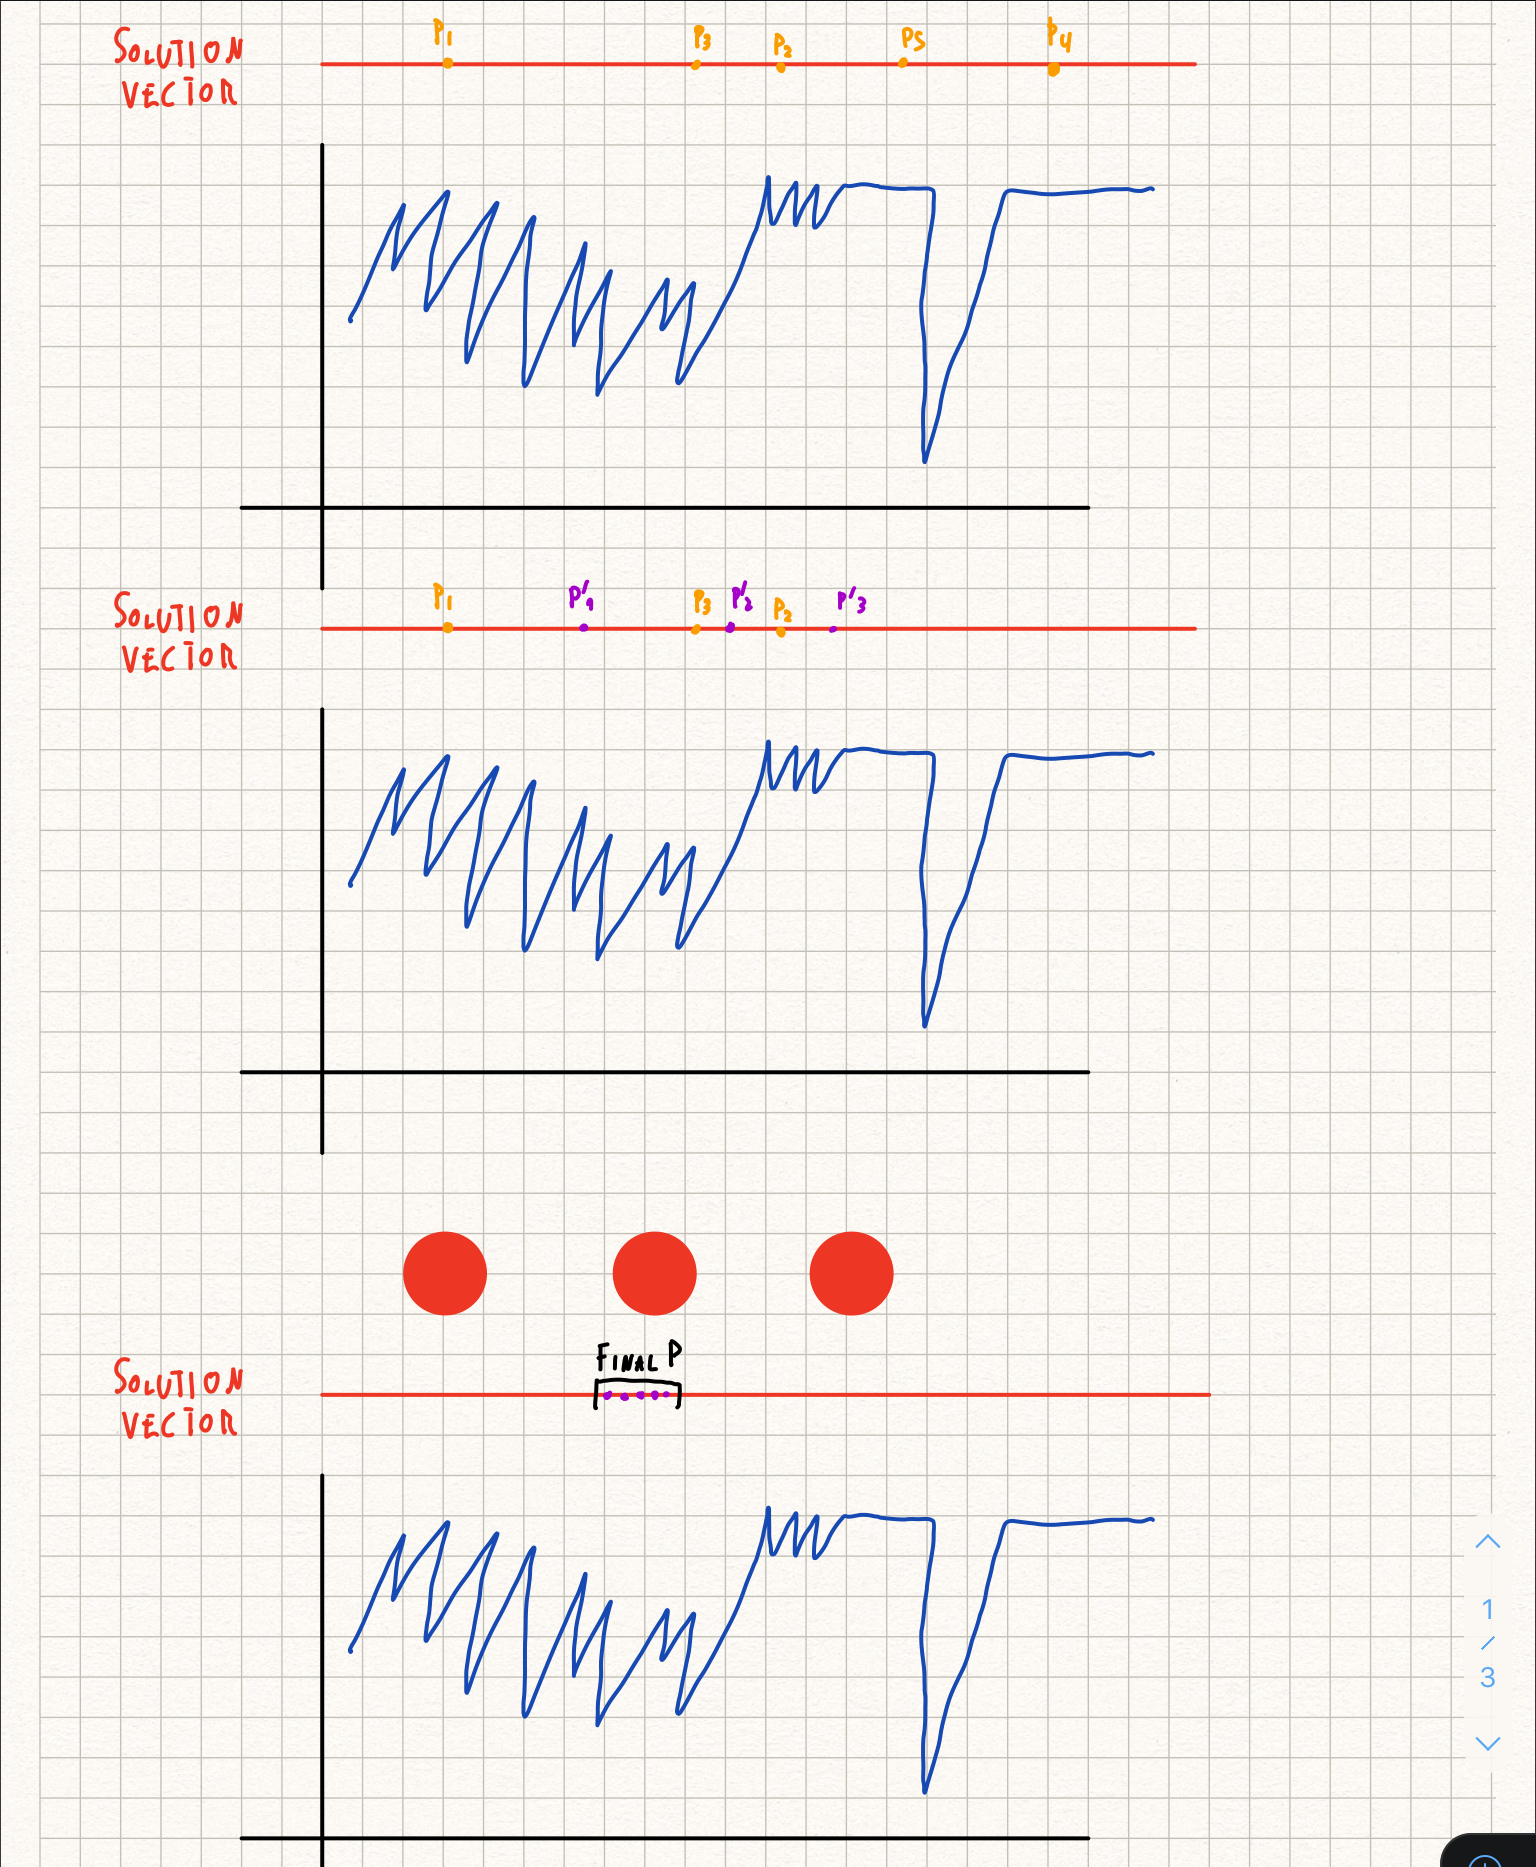
The different images represent the search space and the solution vector is on top of it. In this simple representation we can clearly see what happens if we "the N fittest individuals". From the 1st graphic representation to the 2nd one we see that we lose the 2 points that are closer to the global minimum. after the iterations, we will end with a solution that may or may not be the global minimum. Once we add complexity to the problem to resolve and layers of neurons, not finding the global minimum will be the norm. That is the reason why taking the N fittest individuals won't lead to find the global minimum.
We can add more selection and crossover operators to the mix as further improvement.
We can also make a statistic study of different values for the mutation, selection and crossover operators in order to test what combination of this hyperparameters gives better results in training.
